<a href="https://colab.research.google.com/github/bhagirathbhard/Netflix-Content-Analysis/blob/nightly/Team_Submission_A7_Netflix_Content_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<a id="Content" style="color:#023e8a;">Table of Content</a>**

* [**<span style="color:#023e8a;">1. Project Overview</span>**](#Project-Overview) 
* [**<span style="color:#023e8a;">2. Data Sources</span>**](#Data-Sources)
* [**<span style="color:#023e8a;">3. Data Import and EDA</span>**](#EDA)
* [**<span style="color:#023e8a;">4. Data Cleanup</span>**](#Data-Cleanup)
* [**<span style="color:#023e8a;">5. Key Questions Answered</span>**](#Questions)
* [**<span style="color:#023e8a;">6. Conclusion</span>**](#Conclusion)
* [**<span style="color:#023e8a;">7. References</span>**](#References)

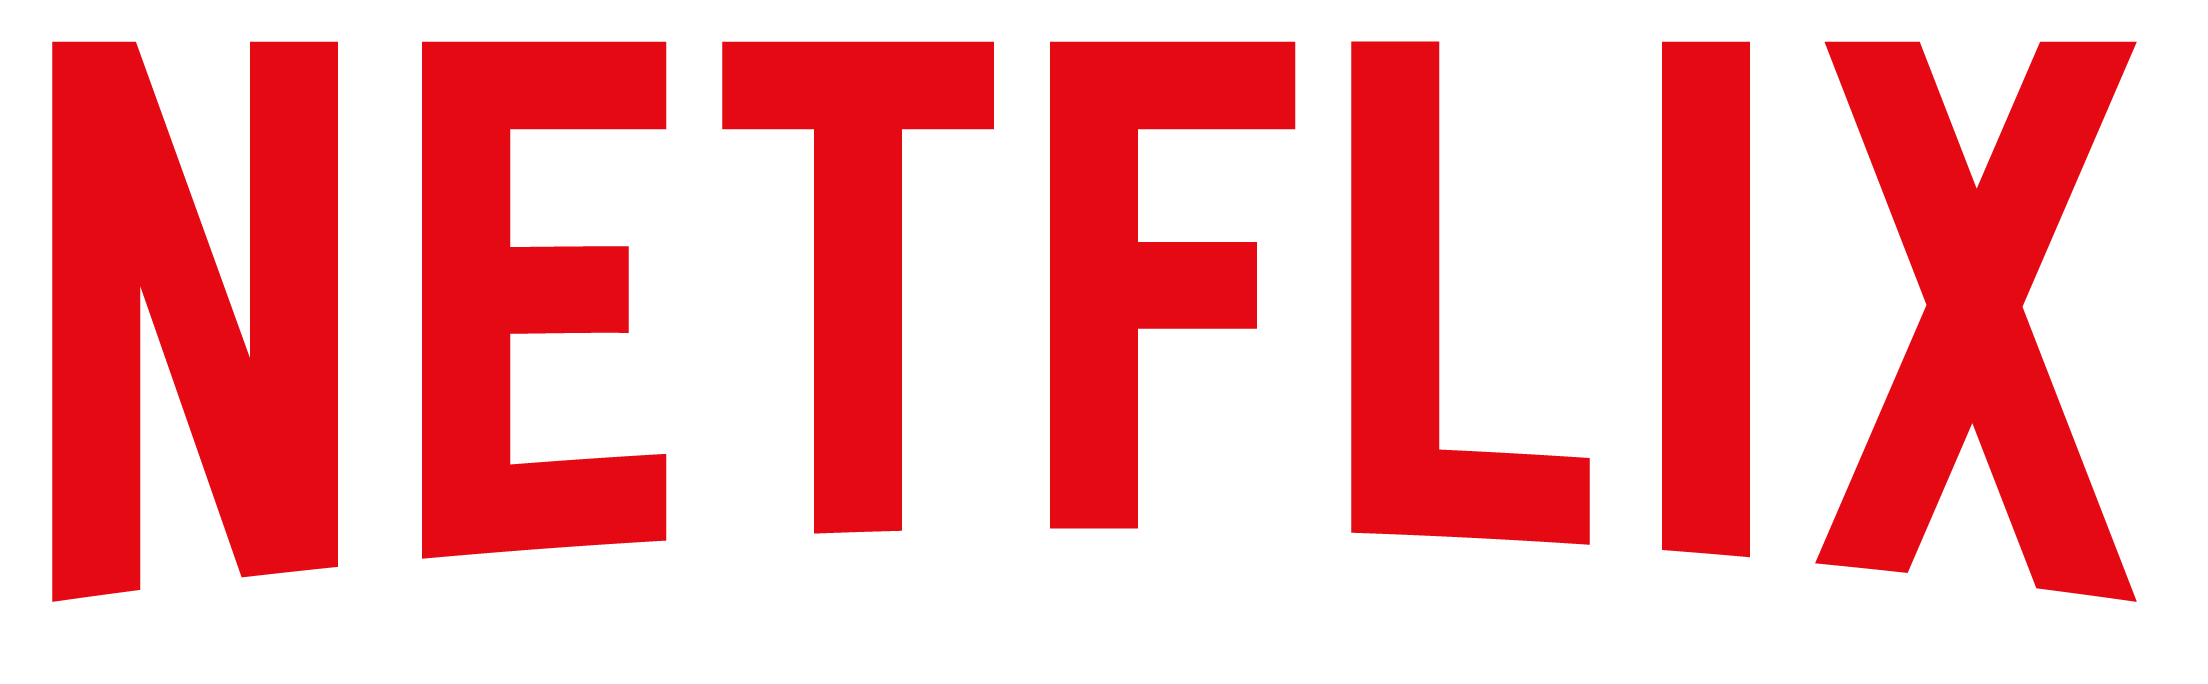

# **<span style="color:#023e8a;font-size:200%"><center>Analysis of Netflix Content Library</center></span>**

## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">By: Bhagirath Bhardwaj, Jinisha Kande, Paulin Jesintha Mariadoss, Renata Halim, Sohil Jain, and Sonal Kaur</span></center>**

# **<span id="Project-Overview" style="color:#023e8a;">Project and Dataset Overview</span>**

**Netflix Content Analysis**


Netflix’s content library and their recommendations engine play a big role in what content consumed by people worldwide. Research from Netflix shares that over 80% of the content watched on their platform came from
Their recommendations engine. As Netflix has over 100 million users worldwide, it becomes crucial for Netflix to implement a strong data-driven algorithm to recommend customized movies and tv shows to its audience.

The following project seeks to -

*   Perform Exploratory Data Analysis, Data cleanup on the dataset using Python.
*   Analyze variables in our dataset such as actors, genres, directors, ratings etc.
*  Find answers to key questions and trends around Netflix’s investment into various kinds of content media.


**Motivation:** The project is interested in studying the changes in Netflix’s content strategy over the years. We are curious to know if or to what extent these changes resulted from cultural and target audience changes in Netflix's subscriber base.

**Pro-tip!**

Use the table-of-contents in the notebook to traverse the notebook.

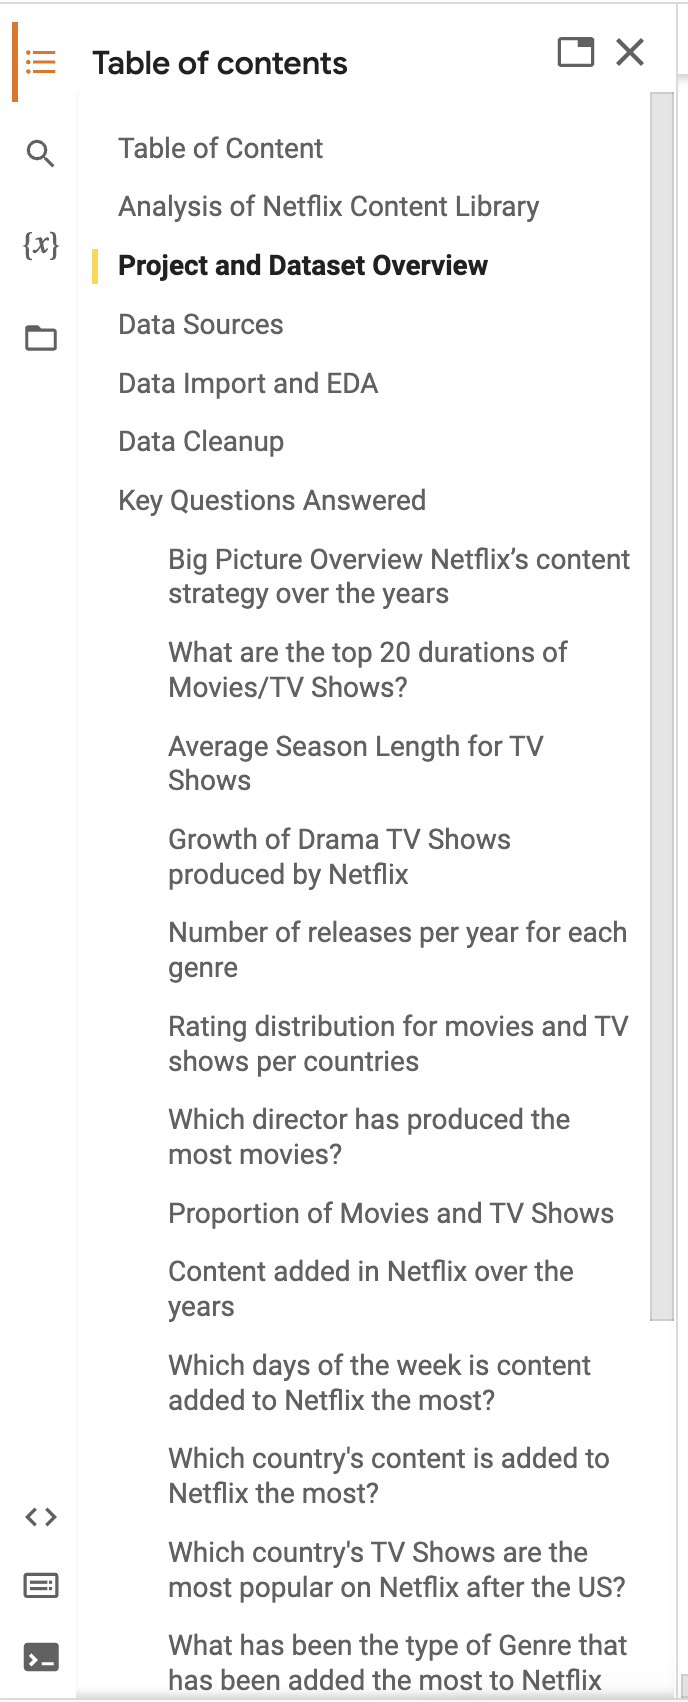

# **<span id="Data-Sources" style="color:#023e8a;">Data Sources</span>**

*   [Netflix-Shows by Shivam Bansal](https://www.kaggle.com/datasets/shivamb/netflix-shows)
*  [Clarification of Source of dataset by Author](https://twitter.com/shivamshaz/status/1452642649442172931?s=20&t=OSh8EM8VNMZhmXSi6aBgtA)
> “mix of scraping, api calls and manual validation.”

* [Scraped Data - Netflix Original Programming](https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming)

# **<span id="Data-Cleanup" style="color:#023e8a;">Data Import and EDA</span>**


In [ ]:
#Importing Libraries
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('dark_background')
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!cd gdrive/Shareddrives/BA780/.kaggle/

In [ ]:
#Read Kaggle API token
os.environ['KAGGLE_CONFIG_DIR'] = "gdrive/Shareddrives/BA780/.kaggle/"

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Set permissions
! chmod 600 gdrive/Shareddrives/BA780/.kaggle/kaggle.json

In [ ]:
#Use Kaggle library to downlaod dataset
!kaggle datasets download -d shivamb/netflix-shows

netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip netflix-shows.zip 

Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: netflix_titles.csv      


In [ ]:
#netflix_ds = pd.read_csv('/Users/bhagirathbhardwaj/Library/CloudStorage/GoogleDrive-bbhardw@bu.edu/Shared drives/BA780/netflix_titles.csv')
netflix_ds = pd.read_csv('netflix_titles.csv')
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Check dataset shape
netflix_ds.shape

(8807, 12)

In [ ]:
#Check Dataset info
netflix_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_ds.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# **<span id="Data-Cleanup" style="color:#023e8a;">Data Cleanup</span>**



In [ ]:
#Check Null Values per column
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_ds.dropna(inplace=True,thresh=2) #Threshold of 2 does not end up removing anything

In [ ]:
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_ds.shape

(8807, 12)

In [ ]:
netflix_ds["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#Rating has duration (74 mins, 84 etc. needs to be cleaned and replaced)
netflix_ds[netflix_ds["rating"].isin(["74 min","84 min","66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| Louis C.K. 2017      | TV-MA       |
| Louis C.K.: Hilarious   | TV-MA        |
| Louis C.K.: Live at the Comedy Store | TV-MA |

In [ ]:
#Replacing the ratings from NaN
netflix_ds["rating"].replace(["74 min","84 min","66 min"], "TV-MA", inplace= True)

In [ ]:
netflix_ds[netflix_ds["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| 13TH: A Conversation with Oprah Winfrey & Ava DuVernay| TV-PG |
| Gargantia on the Verdurous Planet      | TV-14       |
| Little Lunch	   | TV-MA        |
| My Honor Was Loyalty	 | PG-13 |

In [ ]:
#Find location of the Movies and Shows and replace their ratings
netflix_ds[netflix_ds["title"] == "Little Lunch"] = netflix_ds[netflix_ds["title"] == "Little Lunch"].replace(np.nan, "TV-MA")
netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"] = netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"].replace(np.nan, "TV-PG")
netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"] = netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"].replace(np.nan, "TV-14")
netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"] = netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"].replace(np.nan, "PG-13")

In [ ]:
netflix_ds["rating"].value_counts(ascending=False)

TV-MA       3211
TV-14       2161
TV-PG        864
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2631
cast             825
country          830
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Replacing and filling in director, cast, and country 
netflix_ds.fillna({'director': 'Not Listed', 'country': 'Not Listed', 'cast': 'Not Listed'}, inplace=True)
pd.isnull(netflix_ds).sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
netflix_ds.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Unique values in each column
netflix_ds.nunique().sort_values(ascending=False)

show_id         8807
title           8807
description     8775
cast            7693
director        4532
date_added      1767
country          750
listed_in        514
duration         220
release_year      74
rating            14
type               2
dtype: int64

In [ ]:
#Convert Date Added column and Release Year to datetime
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'])
netflix_ds['release_year'] = pd.to_datetime(netflix_ds['release_year'], format='%Y')

# **<span id="Questions" style="color:#023e8a;">Key Questions Answered</span>**


## 1) Big Picture Overview Netflix’s content strategy over the years

In [ ]:
#Install Plotly Library
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Create plot that can be hovered over
import plotly.express as px
#set background color to black
px.defaults.template = "plotly_dark"

fig = px.scatter(netflix_ds, x="release_year", y="duration", color="rating", hover_name="title", size_max=60)
#Set title
fig.update_layout(title_text='Netflix Content Analysis')
fig.show()

We notice heavy weightage as expeted on Netflix to have movies that have been released recently. However, it was interesting to note the following observations -

**Oldest TV Shows by Release Date** - 

Pioneers: First Women Filmmakers. 
Released in the year `Jan 1925`

**Oldest Movie by Release Date** -

Rebel Without a Cause
Released in the year `Jan 1955`

Of course with such a big dataset it is helpful to bifurcate between Movies and TV shows -

## 2) Bifurcation of Movie and TV Shows increase over the years

In [ ]:
#Calculate only years from date_added
netflix_ds['date_added_year'] = netflix_ds['date_added'].dt.year

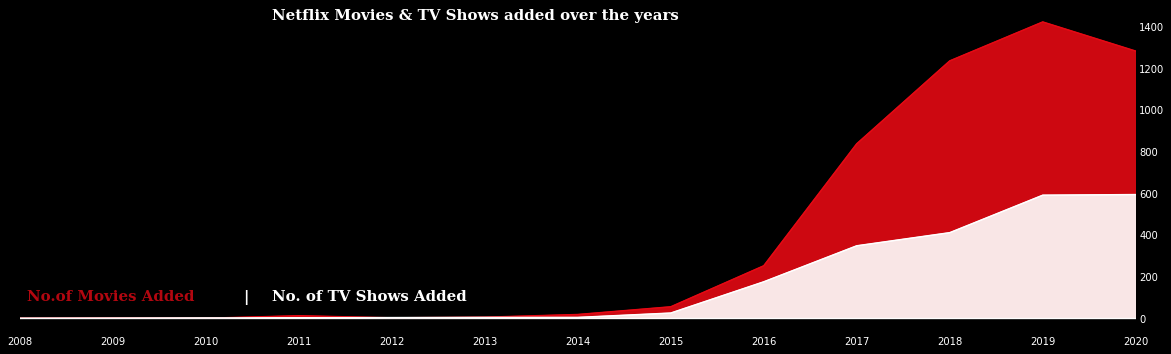

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('dark_background')

# Movies and TV shows added over the years

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
color = ["#E50914", "#ffffff"]

for i, mtv in enumerate(netflix_ds['type'].value_counts().index):
    mtv_rel = netflix_ds[netflix_ds['type']==mtv]['date_added_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'white', linewidth = 1.4, alpha = .9)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.30, 0.85, 'Netflix Movies & TV Shows added over the years', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13,0.2,"No.of Movies Added", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.28,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='white')
fig.text(0.3,0.2,"No. of TV Shows Added", fontweight="bold", fontfamily='serif', fontsize=15, color='#FFFFFF')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**Observations**

We clearly see a big increase in the addition of content by Netflix after `2016`. Especially with `2019` being the year with most added Movies and `2020` being the year with most amount of TV Shows added.

In [ ]:
#Verifying through code the findings to ensure visualizations are correct
netflix_ds[netflix_ds['type'] == 'Movie']['date_added_year'].value_counts().head(1)

2019.0    1424
Name: date_added_year, dtype: int64

In [ ]:
netflix_ds[netflix_ds['type'] == 'TV Show']['date_added_year'].value_counts().head(1)

2020.0    595
Name: date_added_year, dtype: int64


In addition to just the content added, it could be interesting to see the top durations of both Movies and TV Shows addded by Netflix

## 3) Top 20 Durations of both Movies and TV shows by Netflix

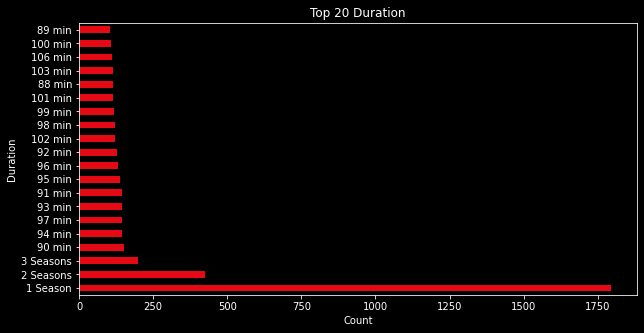

In [ ]:
#Plot top 20 duration column color code by rating
netflix_ds['duration'].value_counts().head(20).plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Top 20 Duration')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

It could also be interesting to assess if there are any specific days on which Netflix prefers to add their content.

## 4) Which days of the week is content added to Netflix the most?


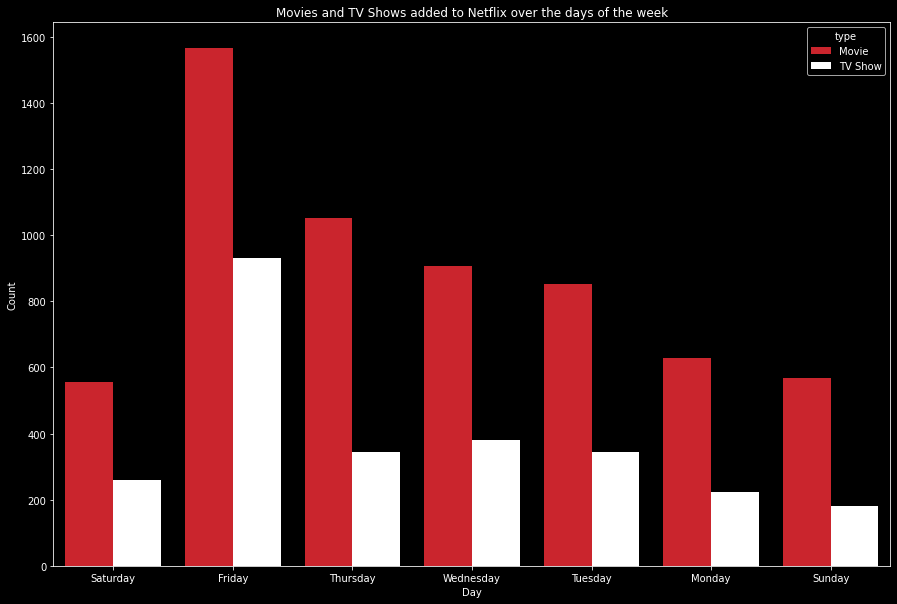

In [ ]:
#Plot and Hue by type the days of the week when content was added to Netflix
#Create a column of date added day of the week
netflix_ds['date_added_day'] = netflix_ds['date_added'].dt.day_name()
plt.figure(figsize=(15,10))
#Change color of plot to red and white
sns.countplot(x='date_added_day', hue='type', data=netflix_ds, palette=['#E50914', '#ffffff'])
plt.title('Movies and TV Shows added to Netflix over the days of the week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**Observations**

Netflix shows a heavy preference in adding content on Friday's as opposed to having Sunday as the last day when content is added to Netflix. In our research, this tracks well with industry practice.

We found it interesting that Sunday was less preferred than Monday. In our research, it can be argued this is because of Netflix's general content release practice of adding TV Shows with all episodes where people can binge watch their content. That makes it preferable to release on Fridays.

Moving further into the analysis, it is worthwhile to review the Genres which Netflix favors the most.

## 5) What has been the type of Genre that has been added the most to Netflix before and after 2016?

We chose to split the Genres before and after 2016 because of Netflix's expansion to 140 countries in 2016. 

We wanted to see if the type of content added to Netflix changed after the expansion. We also wanted to see if the type of content added to Netflix changed after the expansion to 140 countries in 2016 was due to the change in the target audience.

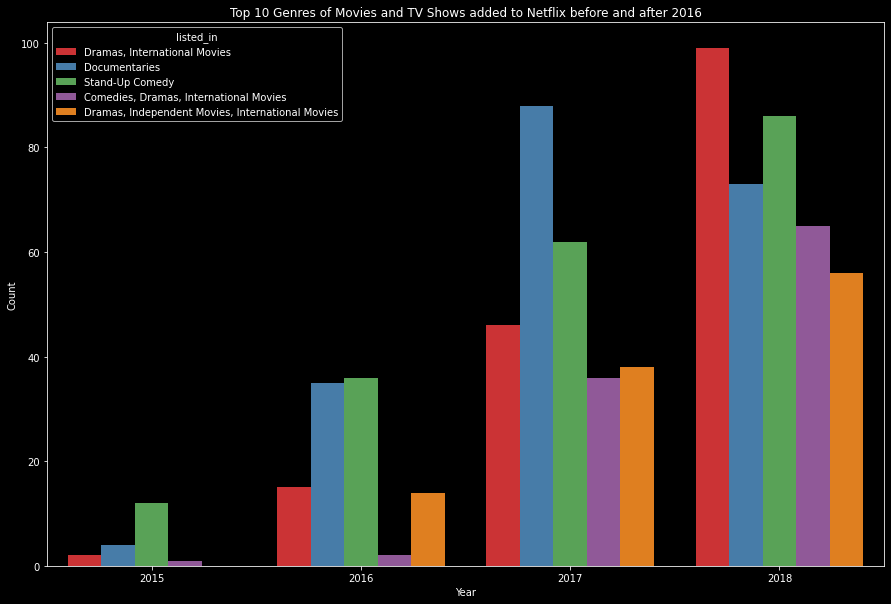

In [ ]:
#plot the top 10 genres of movies and tv shows before and after 2016
plt.figure(figsize=(15,10))
sns.countplot(x='date_added_year', hue='listed_in', data=netflix_ds, palette='Set1', order=[2015,2016,2017,2018], hue_order=netflix_ds['listed_in'].value_counts().index[:5])
plt.title('Top 10 Genres of Movies and TV Shows added to Netflix before and after 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observation**

Except the known fact that Netflix had not a lot of content added before `2016`, we see it is interesting in the increase of `Documentaries`, and `Dramas, International Movies`.

# **<span id="Conclusion" style="color:#023e8a;">Conclusion</span>**

Netflix clearly had a big shift in `2016` with their expansion to over `140` countries. In this project, we analyzed multiple dataset to understand their shift in content adding practicies among genres, durations, type as well as compare it to its peers such as Disney+, Hulu etc. later on in the full project submission.

# **<span id="References" style="color:#023e8a;">References</span>**

References


*  https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
* https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
* https://www.holisticseo.digital/python-seo/word-cloud/
*  https://www.dataquest.io/blog/making-538-plots/
*  https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
*  https://www.kaggle.com/general/51898
*  https://www.imdb.com/
* https://www.kaggle.com/code/joshuaswords/netflix-data-visualization


